<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 1</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mesbahamirhossein@gmail.com">Amirhossein Mesbah</a><br></font><br>
    </div>
</div>

# Numpy

### Question1: mean and std of numbers between 10 and 1000.

In [16]:
import numpy as np
# have not counted 10 and 1000 just the nums between
a=np.arange(11,1000,1)
#print(a)
print("mean is: ", np.average(a))
print("standarad deviation is: ", np.std(a))

[ 11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 25

### Question2: nearest point to each random point.

In [23]:
# random generating 10th dimensional points
b = np.random.random([100,10])

# computing the Euclidean distance

# repeating all points in 3th dimension
b_3 = np.repeat(b.reshape(1, 100, 10), 100, axis=0)
# repeating all points in 2th dimention
b_2 = np.repeat(b.reshape(100, 1, 10), 100, axis=1)
# calculating distances
distance = np.sqrt(np.sum((b_3 - b_2)**2, axis=2))
# find 2nd min in each rows
nearest_neighbor_index = distance.argsort()[:,1]
nearest_neighbor_index

array([44, 66, 40, 10, 10, 44,  8, 12,  6, 54,  3, 62, 59, 30, 39, 52,  8,
       67, 25, 92, 46, 61, 48, 71, 39, 54, 25, 59, 72, 33, 13, 28, 91, 29,
       41, 27, 40, 83,  4, 80, 61, 89, 55, 63,  5, 39, 64, 14, 74, 99, 90,
       94, 74, 59, 24, 42, 45, 38, 98, 53, 85, 40, 11, 70, 46, 74, 67, 66,
       30, 90, 90, 23, 28, 78, 52, 88, 95,  1, 73, 68, 39, 76, 78, 12, 72,
       60, 74, 89, 75, 87, 50, 64, 19, 60, 21, 76, 50, 67, 58, 66],
      dtype=int64)

### Question3: Histogram of distances.

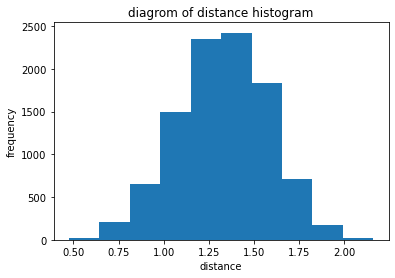

In [26]:
import matplotlib.pyplot as plt

c = distance[~np.eye(distance.shape[0],dtype=bool)].reshape(distance.shape[0],-1).reshape(-1)
plt.xlabel('distance')
plt.ylabel('frequency')
plt.title('diagrom of distance histogram')
plt.hist(c);

### Question4:

Execute the cell below. By running this cell, a dataset will be loaded from `patents.csv` file. In this notebook, you are asked to analyze this data in several ways. There are three numpy arrays in this dataset:

- `patent_number`: a unique identifier for each patetnt
- `patent features`: a vector of 16 features describing several properties of each patent
- `category`: the category to which a patent belongs


In [30]:
import pandas as pd
import numpy as np
# as been said 
df = pd.read_csv('data/patents.csv')
patent_category = df['category']
patent_number = df['publication_number'].to_numpy()
patent_features = df['patent_embedding'].to_numpy()
d = []
for i in range(patent_features.size):
    s = str(patent_features[i])
    s1 = s.replace(r'\n', '')
    d.append(np.array(s.split()[1:-1], dtype='float')[:16] )

patent_features = np.stack(d)

#### Part1: Which patent has the highest norm? (Eucledian distance from origin)

In [31]:
np.sqrt(np.sum(patent_features ** 2, axis = 1)).argmax()

10839

#### Part 2: Find the two patents that are the farthest from eachother

In [38]:
# function for furthest patents
def furthest_patent(index):
    distances = np.sqrt(np.sum((patent_features - patent_features[index])**2, axis=1))
    furthest_index = distances.argsort()[-1]
    furthest_distance = distances[furthest_index]
    return furthest_index, furthest_distance
# furthest distances between indexec
f= list(map(furthest_patent, np.arange(len(patent_features))))
index_dist = np.concatenate([np.arange(len(f)).reshape(-1, 1),np.array(f)], axis=1)
a,b,_ = sorted(index_dist, key=lambda t: t[2], reverse=True)[0]
a,b

(1661.0, 9236.0)

#### Part 3: Write a function that, given a patent number, finds its nearest neighbour.

In [40]:
# function for closest neighbor
def nearest_neighbor(index):
    nearest_index = np.sqrt(np.sum((patent_features - patent_features[index])**2, axis=1)).argsort()[1]
    return nearest_index
    
nearest_neighbor(1)

2147

#### Part 4: How many patents have a nearest neighbour that is in the same category?

In [42]:
#list of neighbors for every patent
g = list(map(nearest_neighbor, np.arange(len(patent_features))))
neighbor_index = np.arange(len(patent_features))
neighbor_label = patent_category.loc[g].reset_index(drop=True)
index_label = patent_category.loc[neighbor_index]
sum(neighbor_label == index_label)

13000

#### Part 5: What is the average and std of distances between every pair of patents within a category? Using these calculated quantities, which cluster do you think is more condensed? Which one is more scattered?

In [45]:
#function for cluster distacnes
def cluster_dist(index):
    cluster_index = patent_category[index]
    clr_index = patent_category.loc[patent_category == cluster_index].index
    clustermate = patent_features[clr_index]
    distance = np.sqrt(np.sum((clustermate - patent_features[index])**2, axis=1)).argsort()[1:]
    return cluster_index, distance
clr_distance = np.array(list(map(cluster_dist, np.arange(len(patent_category)))),dtype='object')
# computing distance for every cluster
def info_clr(cluster_index):
    clr_dist = np.concatenate(list(clr_distance[clr_distance[:, 0] == cluster_index][:, 1]))
    return cluster_index, clr_dist.mean()/2, clr_dist.std()/2
list(map(info_clr, np.arange(len(set(patent_category)))))

[(0, 486.7503725523076, 281.1695431964802),
 (1, 675.2501581233039, 389.9999868777246),
 (2, 229.49885911322576, 132.64496796488595),
 (3, 254.7473339875695, 147.2237546412691),
 (4, 319.0022697814971, 184.32036187954992),
 (5, 342.2494838792235, 197.74187066509498),
 (6, 1064.7495489805074, 614.8780941877467),
 (7, 548.0007421382235, 316.5326688850601)]

In [ ]:
#based on distances of each cluster cluster#2 is the most condensed and cluster#6 is the most scattered.

# Working with different Data Files

## .txt

### Part 1: store words in a list

In [321]:
with open('./data/zen_of_python.txt') as df1:
    text = df1.read()
# seperating words from the dataframe
words = []
for word in text.split():
    if word not in words:
        words.append(word)
    else:
        continue
wrods

FileNotFoundError: [Errno 2] No such file or directory: './data/zen_of_python.txt'

### Part 2: Occurrence of each character

In [319]:
char_counter = {}
for char in text:
    if char not in char_count:
        char_counter[char] = 1
    else:
        char_counter[char] += 1
char_tbl = pd.DataFrame(char_counter.items(), columns=['char', 'count'])
# table of charactors with its frequency
char_tbl

NameError: name 'text' is not defined

### Part 3: Occurrence of each word

In [318]:
word_tbl = pd.DataFrame(words, columns=['word'])
counter = []
for word in words:
    counter.append(text.count(word))
word_tbl['count'] = counter
#table of word frequencies
word_tbl

NameError: name 'words' is not defined

### Part 4: Define a function for saving stats at the end of `.txt` file

In [317]:
def txt_save(file_name):
    with open(file_name, 'r') as df:
        text = df.read()
    word_num = len(text.split())
    char_num = len(text)
    line_num = len(text.splitlines())
    with open(file_name, 'a') as h:
        h.write("\n\n"+"No. Words: "+str(word_num))
        h.write("\n"+"No. Chars: "+str(char_num))
        h.write("\n"+"No. Lines: "+str(line_num))


### Part 5: Apply your defined function on 'zen_of_python.txt`

In [316]:
txt_save('./data/zen_of_python.txt')
with open('./data/zen_of_python.txt') as i:
    text = i.read()
text

FileNotFoundError: [Errno 2] No such file or directory: './data/zen_of_python.txt'

## csv

### Part 1: number of features and data points

In [169]:
#reading dataset
df2 = pd.read_csv('data/patents.csv')
df2


,publication_number,title,cpc_code,patent_embedding,category
0,US-2019250858-A1,memory controller and operating method thereof,G06F3/061,[ 0.00135472 0.01564001 -0.04858465 0.039866...,1
1,US-1000462-A,corn planter,A01C9/00,[-4.44490612e-02 2.48770583e-02 -5.62837869e-...,6
2,KR-200146416-Y1,antitheft vehicle security system,B60R25/209,[-2.53110677e-02 -2.04547048e-02 8.63679312e-...,0
3,KR-0160422-B1,a door opening and shutting apparatus and meth...,D06F37/42,[ 1.21761542e-02 1.97522007e-02 -6.62921891e-...,1
4,US-952306-A,spray burner,B05B1/3033,[-0.00214472 0.01606156 -0.09518531 0.060160...,0
...,...,...,...,...,...
15684,AT-415717-T,method and device for produce a low pressure w...,H01M8/04104,[ 1.77878514e-02 3.53233777e-02 -3.37363742e-...,1
15685,AT-424202-T,substitute _NUMBER_ thio _NUMBER_ _NUMBER_ dic...,C07D417/12,[-0.03664465 -0.01075565 -0.02483719 -0.033502...,5
15686,CA-2952951-A1,end tip for a vehicle wiper blade,B60S1/3894,[-4.39246558e-02 2.96350904e-02 -2.31920835e-...,0
15687,CH-608317-A,process for the compressive shrinkage of a web...,D06C21/00,[-3.34328553e-03 1.02757774e-02 -2.01825500e-...,6


In [171]:
# number of rows and columns
rows, columns = df2.shape
print('row number: ', rows)
print('column number: ', columns)

row number:  15689
column number:  5


### Part 2: Name of Features

In [172]:
dataframe.columns

Index(['Title', 'Lang', 'Record_date', 'url', 'Description', 'Category',
       'Tags', 'Speakers', 'Duration'],
      dtype='object')

### Part 3: Print Stats of Dataframe

In [184]:
patent_features = df2['patent_embedding'].to_numpy()
k = []
for i in range(patent_features.size):
    s = str(patent_features[i])
    s1 = s.replace(r'\n', '')
    k.append(  np.array(s.split()[1:-1], dtype='float')[:16] )
patent_features = np.stack(k)
print('min  of patents is:', patent_features.min())
print('1qrt of patents is:', np.quantile(patent_features, 0.25))
print('2qrt of patents is: ', np.quantile(patent_features, 0.50))
print('3qrt of patents is: ', np.quantile(patent_features, 0.75))
print('max  of patents is: ', patent_features.max())
print('mean of patents is:', patent_features.mean())
print('std  of patents is: ', patent_features.std())

min  of patents is: -0.220091701
1qrt of patents is: -0.025111302500000002
2qrt of patents is:  0.0014436508050000001
3qrt of patents is:  0.022530463325
max  of patents is:  0.19629097
mean of patents is: -0.0011592785246842096
std  of patents is:  0.0361777916066041


### Part 4: print rows.

In [186]:
# 5 first rows
df2.head(5)

,publication_number,title,cpc_code,patent_embedding,category
0,US-2019250858-A1,memory controller and operating method thereof,G06F3/061,[ 0.00135472 0.01564001 -0.04858465 0.039866...,1
1,US-1000462-A,corn planter,A01C9/00,[-4.44490612e-02 2.48770583e-02 -5.62837869e-...,6
2,KR-200146416-Y1,antitheft vehicle security system,B60R25/209,[-2.53110677e-02 -2.04547048e-02 8.63679312e-...,0
3,KR-0160422-B1,a door opening and shutting apparatus and meth...,D06F37/42,[ 1.21761542e-02 1.97522007e-02 -6.62921891e-...,1
4,US-952306-A,spray burner,B05B1/3033,[-0.00214472 0.01606156 -0.09518531 0.060160...,0


In [188]:
# 5 last rows
df2.tail(5)

,publication_number,title,cpc_code,patent_embedding,category
15684,AT-415717-T,method and device for produce a low pressure w...,H01M8/04104,[ 1.77878514e-02 3.53233777e-02 -3.37363742e-...,1
15685,AT-424202-T,substitute _NUMBER_ thio _NUMBER_ _NUMBER_ dic...,C07D417/12,[-0.03664465 -0.01075565 -0.02483719 -0.033502...,5
15686,CA-2952951-A1,end tip for a vehicle wiper blade,B60S1/3894,[-4.39246558e-02 2.96350904e-02 -2.31920835e-...,0
15687,CH-608317-A,process for the compressive shrinkage of a web...,D06C21/00,[-3.34328553e-03 1.02757774e-02 -2.01825500e-...,6
15688,CN-100513251-C,system and process for open cover vessel hull,B63B71/00,[-1.98921170e-02 3.07969116e-02 -2.46879123e-...,6


In [189]:
# 5 random row
df2.sample(5)

,publication_number,title,cpc_code,patent_embedding,category
1825,KR-20110039264-A,personal security manager for ubiquitous patie...,H04L63/062,[-0.02690135 0.0053159 -0.02545968 0.035562...,7
11221,DK-3253691-T3,vehicle equip with a device for drain and clea...,B65F7/005,[-2.11000275e-02 2.12849379e-02 -2.76564248e-...,6
6852,US-10446843-B2,positive electrode active material particle po...,H01M4/505,[-1.37902368e-02 2.32387464e-02 -4.01112922e-...,5
5821,CN-109478750-A,electric connector with terminal support mass,H01R4/24,[-2.63352133e-02 2.07070727e-02 2.22341856e-...,0
11010,IE-59003-B1,carbohydrate refining process and enzyme compo...,C12N9/20,[-0.02924035 0.03252974 -0.05041441 0.035099...,6


In [190]:
#type of each columns
df2.dtypes

publication_number    object
title                 object
cpc_code              object
patent_embedding      object
category               int64
dtype: object

### Part 5: use iloc and loc to select rows

In [191]:
# loc
df2['title'].loc[1024: 2048]

1024    device for purple coupling of rotatable axle o...
1025                                     heat pump system
1026    condensation dryer comprise a heat pump and me...
1027                     animal _NUMBER_ plead ingredient
1028                      electrostatic dust precipitator
                              ...                        
2044                  crystalline anti htnfalpha antibody
2045    method information processing apparatus and co...
2046        pork rind bait and method of prepare the same
2047    process for the treatment of titanium contain ...
2048    air condition system of a motor vehicle and me...
Name: title, Length: 1025, dtype: object

In [192]:
# iloc
df2['title'].iloc[1024: 2049]

1024    device for purple coupling of rotatable axle o...
1025                                     heat pump system
1026    condensation dryer comprise a heat pump and me...
1027                     animal _NUMBER_ plead ingredient
1028                      electrostatic dust precipitator
                              ...                        
2044                  crystalline anti htnfalpha antibody
2045    method information processing apparatus and co...
2046        pork rind bait and method of prepare the same
2047    process for the treatment of titanium contain ...
2048    air condition system of a motor vehicle and me...
Name: title, Length: 1025, dtype: object

### Part 5: Check Dataframe for NaN values

In [193]:
df2.isna().sum()

publication_number    0
title                 0
cpc_code              0
patent_embedding      0
category              0
dtype: int64

### Part 6: Check Dataframe for duplicates

In [194]:
df2.duplicated().sum()

9

### Part 7: Use `Lambda` Function for calculating word counts

In [195]:
length = lambda x: len(x['title'].split(' '))
df2['title_length'] = df2.apply(length, axis=1)
df2

,publication_number,title,cpc_code,patent_embedding,category,title_length
0,US-2019250858-A1,memory controller and operating method thereof,G06F3/061,[ 0.00135472 0.01564001 -0.04858465 0.039866...,1,6
1,US-1000462-A,corn planter,A01C9/00,[-4.44490612e-02 2.48770583e-02 -5.62837869e-...,6,2
2,KR-200146416-Y1,antitheft vehicle security system,B60R25/209,[-2.53110677e-02 -2.04547048e-02 8.63679312e-...,0,4
3,KR-0160422-B1,a door opening and shutting apparatus and meth...,D06F37/42,[ 1.21761542e-02 1.97522007e-02 -6.62921891e-...,1,12
4,US-952306-A,spray burner,B05B1/3033,[-0.00214472 0.01606156 -0.09518531 0.060160...,0,2
...,...,...,...,...,...,...
15684,AT-415717-T,method and device for produce a low pressure w...,H01M8/04104,[ 1.77878514e-02 3.53233777e-02 -3.37363742e-...,1,17
15685,AT-424202-T,substitute _NUMBER_ thio _NUMBER_ _NUMBER_ dic...,C07D417/12,[-0.03664465 -0.01075565 -0.02483719 -0.033502...,5,13
15686,CA-2952951-A1,end tip for a vehicle wiper blade,B60S1/3894,[-4.39246558e-02 2.96350904e-02 -2.31920835e-...,0,7
15687,CH-608317-A,process for the compressive shrinkage of a web...,D06C21/00,[-3.34328553e-03 1.02757774e-02 -2.01825500e-...,6,12


### Part 8: Plot Histogram of Word counts

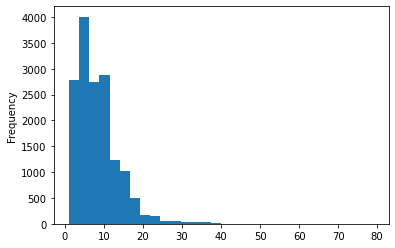

In [197]:
df2['title_length'].plot.hist(bins=30);

## Log

### Part 1: Number of Total Commits

In [315]:
import numpy as np
import pandas as pd
df3 = open('data/git_log.log', 'r', encoding='utf8')
# state and counter
l = 0
counter = 0
for line in df3.readlines():
    if 'commit' in line and l == 0:
        l = 1
    elif 'Author' in line and l == 1:
        l = 2
    elif 'Date' in line and l == 2:
        l = 0
        counter += 1
file.close()
# total number of commits
print('total number of commits is :', counter)

total number of commits is : 536


### Part 2: Extract Developer name, Email, Commit Count and last commit date and create a Dataframe

In [314]:
df3 = open('data/git_log.log', 'r', encoding='utf8') 
table = {} 
n=0
    for line in df3.readlines():
        if 'commit' in line and n== 0: 
        n = 1 
        elif 'Author' in line and n == 1: 
            n = 2 
    #getting name and email of each developper into a table
            m = line.split() 
            name, email = ' '.join(m[1:-1]), m[-1][1:-1]
        if name not in table.keys():
            table[name] = [0, None, None] 
            table[name][0] += 1 
            table[name][1] = email
    #getting name and email of each developper into a table 
        elif 'Date' in line and n == 2:
            n = 0 
            date = ' '.join(line.split()[1:]) 
            table[name][2] = date 
    df = pd.DataFrame.from_dict(dictionary).transpose().reset_index()
df.columns = ['developer', 'commit_count', 'email', 'last_commit_date']

IndentationError: unexpected indent (2464082497.py, line 4)

### Part 3: Developers with Maximum and Minimum Commit count

In [313]:
##df3 = open('data/git_log.log', 'r', encoding='utf8') 
df3 = df3.sort_values(['commit_count'])
df3.head(1)
df3.tail(1)

AttributeError: '_io.TextIOWrapper' object has no attribute 'sort_values'

## Json

### Part 1: Create Dataframe from Json files

In [295]:
import os, json
import glob

pd.set_option('display.max_columns', None)
my_path = 'data\Videos' 
# creating list for dataframe
json_pattern = os.path.join(my_path,'*.json')
json_list = glob.glob(json_pattern)
# making dataframe
df4 = pd.DataFrame()
for path in json_list:
    json_pointer = open(path, 'r')
    json_file = json.load(json_pointer)
    o = pd.DataFrame(columns=json_file.keys()).append(json_file, ignore_index=True)
    if len(df4)!=0:
        df4 = df4.append(o)
    else:
        df4=tmp
df4 = df4.reset_index(drop=True)
df4 = df4.replace('', np.nan, regex=True)
#df4

C:\Users\AU\AppData\Local\Temp\ipykernel_12684\3433020770.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  o = pd.DataFrame(columns=json_file.keys()).append(json_file, ignore_index=True)
C:\Users\AU\AppData\Local\Temp\ipykernel_12684\3433020770.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  o = pd.DataFrame(columns=json_file.keys()).append(json_file, ignore_index=True)
C:\Users\AU\AppData\Local\Temp\ipykernel_12684\3433020770.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df4.append(o)
C:\Users\AU\AppData\Local\Temp\ipykernel_12684\3433020770.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  o = pd.DataFrame(col

,alias,category,copyright_text,description,duration,id,language,quality_notes,recorded,slug,speakers,summary,tags,thumbnail_url,title,videos,related_urls
0,video/3444/zen-of-quality,PyCon US 2015,creativeCommon,It is extremely important to PBS that digital ...,NaN,3444.0,eng,NaN,2015-04-12,zen-of-quality,[Mike Howsden],NaN,[],https://i.ytimg.com/vi/Q94pNl6jzuk/hqdefault.jpg,Zen of Quality,"[{'length': 0, 'type': 'youtube', 'url': 'http...",NaN
1,video/3474/a-beginners-guide-to-test-driven-de...,PyCon US 2015,creativeCommon,Software is maintained by humans with limited ...,NaN,3474.0,eng,NaN,2015-04-11,a-beginners-guide-to-test-driven-development,[Itamar Turner-Trauring],NaN,[],https://i.ytimg.com/vi/ePaga05gisk/hqdefault.jpg,A Beginner's Guide to Test-driven Development,"[{'length': 0, 'type': 'youtube', 'url': 'http...",NaN
2,video/3371/a-lightning-look-at-oreillys-python...,ChiPy,CC BY,Wouldn't it be awesome if ChiPy wrote its own ...,900.0,3371.0,eng,NaN,2014-12-11,a-lightning-look-at-oreillys-python-books,[Tanya Schlusser],NaN,[lightning talks],https://archive.org/services/img/pyvideo_3371_...,A lightning look at O'Reilly's Python books,"[{'type': 'archive.org', 'url': 'https://archi...",NaN
3,video/3378/a-talk-on-giving-a-pythonic-talk,ChiPy,CC BY,Xan Vongsathorn and Catherine Vongsathorn will...,1500.0,3378.0,eng,NaN,2015-03-12,a-talk-on-giving-a-pythonic-talk,"[Catherine Vongsathorn, Xan Vongsathorn]",NaN,[],https://archive.org/services/img/pyvideo_3378_...,A Talk on Giving a Pythonic Talk,"[{'type': 'archive.org', 'url': 'https://archi...",NaN
4,video/2551/a-visual-guide-to-pandas,ChiPy,CC BY,NaN,30.0,2551.0,eng,NaN,2013-12-12,a-visual-guide-to-pandas,[Jason Wirth],Pandas is the data-munging Swiss Army knife of...,[],https://archive.org/services/img/pyvideo_2551_...,A Visual Guide To Pandas,"[{'type': 'archive.org', 'url': 'https://archi...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,video/1871/who-saved-the-onion-from-being-hack...,ChiPy,CC BY,NaN,5.0,1871.0,eng,NaN,2013-05-09,who-saved-the-onion-from-being-hacked-by-syrian,[Sean Bloomfield],"Well, this isn't at all Python related (or eve...",[],https://i1.ytimg.com/vi/dXTtcs6DrzY/hqdefault.jpg,"Who saved The Onion, from being hacked by ""Syr...","[{'type': 'mp4', 'url': 'http://s3.us.archive....",NaN
240,video/3478/winning-machine-learning-competitio...,PyCon US 2015,creativeCommon,This tutorial will offer an introduction machi...,NaN,3478.0,eng,NaN,2015-04-10,winning-machine-learning-competitions-with-scikit,[Ben Hamner],NaN,[],https://i.ytimg.com/vi/gDbaCIE0mrA/hqdefault.jpg,Winning Machine Learning Competitions With Sci...,"[{'length': 0, 'type': 'youtube', 'url': 'http...",NaN
241,video/3415/words-words-words-reading-shakespea...,PyCon US 2015,creativeCommon,This talk will give an introduction to text an...,NaN,3415.0,eng,NaN,2015-04-11,words-words-words-reading-shakespeare-with-p,[Adam Palay],NaN,[],https://i.ytimg.com/vi/EoWG0lavg9U/hqdefault.jpg,"""Words, words, words"": Reading Shakespeare wit...","[{'length': 0, 'type': 'youtube', 'url': 'http...",NaN
242,video/3483/your-brains-api-giving-and-getting-...,PyCon US 2015,creativeCommon,Software engineers are never done learning sin...,NaN,3483.0,eng,NaN,2015-04-12,your-brains-api-giving-and-getting-technical-he,[Sasha Laundy],NaN,[],https://i.ytimg.com/vi/hY14Er6JX2s/hqdefault.jpg,Your Brain's API: Giving and Getting Technical...,"[{'length': 0, 'type': 'youtube', 'url': 'http...",NaN


In [297]:
df4 = df4[['title', 'language', 'recorded', 'related_urls', 'description', 'category', 'tags', 'speakers', 'duration']]
df4 = df4.rename({'title':'Title', 'language':'Lang', 'recorded':'Record_date', 'related_urls':'url','description': 'Description','category':'Category', 'tags':'Tags', 'speakers':'Speakers','duration':'Duration'}, axis='columns')
df4

,Title,Lang,Record_date,url,Description,Category,Tags,Speakers,Duration
0,Zen of Quality,eng,2015-04-12,NaN,It is extremely important to PBS that digital ...,PyCon US 2015,[],[Mike Howsden],NaN
1,A Beginner's Guide to Test-driven Development,eng,2015-04-11,NaN,Software is maintained by humans with limited ...,PyCon US 2015,[],[Itamar Turner-Trauring],NaN
2,A lightning look at O'Reilly's Python books,eng,2014-12-11,NaN,Wouldn't it be awesome if ChiPy wrote its own ...,ChiPy,[lightning talks],[Tanya Schlusser],900.0
3,A Talk on Giving a Pythonic Talk,eng,2015-03-12,NaN,Xan Vongsathorn and Catherine Vongsathorn will...,ChiPy,[],"[Catherine Vongsathorn, Xan Vongsathorn]",1500.0
4,A Visual Guide To Pandas,eng,2013-12-12,NaN,NaN,ChiPy,[],[Jason Wirth],30.0
...,...,...,...,...,...,...,...,...,...
239,"Who saved The Onion, from being hacked by ""Syr...",eng,2013-05-09,NaN,NaN,ChiPy,[],[Sean Bloomfield],5.0
240,Winning Machine Learning Competitions With Sci...,eng,2015-04-10,NaN,This tutorial will offer an introduction machi...,PyCon US 2015,[],[Ben Hamner],NaN
241,"""Words, words, words"": Reading Shakespeare wit...",eng,2015-04-11,NaN,This talk will give an introduction to text an...,PyCon US 2015,[],[Adam Palay],NaN
242,Your Brain's API: Giving and Getting Technical...,eng,2015-04-12,NaN,Software engineers are never done learning sin...,PyCon US 2015,[],[Sasha Laundy],NaN


Part 2: Handle Missing Values

In [303]:
# how many nans are outh there?
df4.isna().sum()
#filling the missing values
df4['Duration'].fillna(df4['Duration'].mean(), inplace=True)
df4['url'].fillna('Not Found', inplace=True)
df4['Description'].fillna('', inplace=True)
df4['Tags'].fillna('[]', inplace=True)
df4['Category'].fillna('Unknown', inplace=True)

### Part 3: Title of videos published in 2016

In [304]:
df4['Record_date'] = df4['Record_date'].astype('str')
index_2016 = df4['Record_date'].str.contains('2016')
df4.loc[index_2016]['Title'].to_list()

['ChiPy Python Mentorship',
 'Python-based data science to understand knowledge discovery and expertise: A science perspective',
 'The wonder and the horror of the mock module']

### Part 4: Mean, Min, Max, Median of Duration for each Category

In [306]:
#minumum of duration
df4.groupby('Category')['Duration'].min()


Category
ChiPy               4.000000
PyCon US 2015    1479.485294
Unknown           300.000000
Name: Duration, dtype: float64

In [307]:
#maximum of duration
df4.groupby('Category')['Duration'].max()


Category
ChiPy            3600.000000
PyCon US 2015    1479.485294
Unknown          4328.000000
Name: Duration, dtype: float64

In [308]:
#average of duration
df4.groupby('Category')['Duration'].mean()


Category
ChiPy            1011.751765
PyCon US 2015    1479.485294
Unknown          2481.771429
Name: Duration, dtype: float64

In [309]:
#median of duration
df4.groupby('Category')['Duration'].median()


Category
ChiPy            1479.485294
PyCon US 2015    1479.485294
Unknown          2535.000000
Name: Duration, dtype: float64

### Part 5: Create `label` Column

In [310]:
#labling the columns
df4['label'] = 0
df4.loc[df4['Duration']<=2000, ['label'] ] = 2
df4.loc[df4['Duration']>2000, ['label'] ] = 3
df4.loc[df4['Duration']<=1000, ['label'] ] = 1
df4.head(10)

,Title,Lang,Record_date,url,Description,Category,Tags,Speakers,Duration,label
0,Zen of Quality,eng,2015-04-12,Not Found,It is extremely important to PBS that digital ...,PyCon US 2015,[],[Mike Howsden],1479.485294,2
1,A Beginner's Guide to Test-driven Development,eng,2015-04-11,Not Found,Software is maintained by humans with limited ...,PyCon US 2015,[],[Itamar Turner-Trauring],1479.485294,2
2,A lightning look at O'Reilly's Python books,eng,2014-12-11,Not Found,Wouldn't it be awesome if ChiPy wrote its own ...,ChiPy,[lightning talks],[Tanya Schlusser],900.000000,1
3,A Talk on Giving a Pythonic Talk,eng,2015-03-12,Not Found,Xan Vongsathorn and Catherine Vongsathorn will...,ChiPy,[],"[Catherine Vongsathorn, Xan Vongsathorn]",1500.000000,2
4,A Visual Guide To Pandas,eng,2013-12-12,Not Found,,ChiPy,[],[Jason Wirth],30.000000,1
5,A Winning Strategy with The Weakest Link: how ...,eng,2015-04-12,Not Found,Working with weak references should not just b...,PyCon US 2015,[],[Jim Baker],1479.485294,2
6,Achieving Continuous Delivery: An Automation S...,eng,2015-04-12,Not Found,Continuos Deployment is the act of deploying s...,PyCon US 2015,[],[James Cammarata],1479.485294,2
7,Advanced Git,eng,2015-04-11,Not Found,"You know clone, commit, push, and pull. Now yo...",PyCon US 2015,[git],"[David ""DB"" Baumgold]",1479.485294,2
8,Ansible 101,eng,2015-04-10,Not Found,"Interested in Ansible, or in server orchestrat...",PyCon US 2015,[],[Luke Sneeringer],1479.485294,2
9,Ansible beyond YAML,eng,2015-04-11,Not Found,Ansible is a configuration management tool who...,PyCon US 2015,"[ansible, yaml]",[Michael Scherer],1479.485294,2


### Part 6: First and Last video of each label

In [311]:
p = df4.sort_values(by = ['label', 'Record_date']).groupby('label')
pd.concat([p.head(1), p.tail(1)]).reset_index(drop=True)[['Title', 'label', 'Record_date']]

,Title,label,Record_date
0,Hy: A Lisp that transforms itself into the Pyt...,1,2013-05-09
1,ChiPy: Chicago Python User Group Jan. '08 Meeting,2,2008-01-01
2,"Pingo means ""pin, go!""",3,2014-07-09
3,The wonder and the horror of the mock module,1,2016-03-10
4,Speed up your tests with setUpTestData,2,2021-06-04
5,Unlocking the full potential of PostgreSQL ind...,3,2021-06-04


### (Bonus) part 7: WordCloud of Discription